**Jupyter notebook for demonstrating py-itpp**

For autocomplete suggestions, press Tab
For doctring, press shift+Tab

Import stuff

In [1]:
import py_itpp as pyp

Get channel coefficients

In [5]:
frame_duration = 1.0e-3
frame_samples = 15360.0

sampling_interval = frame_duration / frame_samples

fft_size = 1024
symbol_duration = fft_size * sampling_interval # = 66.7 us

channel_spec = pyp.channel.Channel_Specification(pyp.channel.CHANNEL_PROFILE.ITU_Vehicular_A)
channel = pyp.channel.TDL_Channel(channel_spec, sampling_interval)

nrof_taps = channel.taps()
print('Number of taps: ' + str(nrof_taps))

#avg_power_db = vec('-1.0, -1.0, -1.0, 0.0, 0.0, 0.0, -3.0, -5.0, -7.0')
#tap_delay = ivec('0, 2, 4, 6, 8, 16, 50, 70, 154')  # Nearest samples
#channel = TDL_Channel(avg_power_db, tap_delay)

avg_power_db = pyp.vec.vec()
tap_delay = pyp.vec.ivec()
channel.get_channel_profile(avg_power_db, tap_delay)
print('Channel Profile')
print('Avg power [dB]', '\tDelay [samples]')
for tap_index in range(nrof_taps):
    print(avg_power_db[tap_index], '\t', tap_delay[tap_index])

norm_doppler = 30 * sampling_interval
channel.set_norm_doppler(norm_doppler)

# Generate channel coefficients for a few frames
nrof_frames = 100
channel_coeff = pyp.mat.cmat()
channel_coeff.set_size(nrof_frames, nrof_taps, False)

for frame_index in range(nrof_frames):
    frame_start_sample = int(frame_index * frame_samples)
    channel.shift_time_offset(frame_start_sample)
    frame_channel_coeff = pyp.mat.cmat()
    channel.generate(1, frame_channel_coeff)
    channel_coeff.set_row(frame_index, frame_channel_coeff.get_row(0))

Number of taps: 6
Channel Profile
Avg power [dB] 	Delay [samples]
-3.142557090264135 	 0
-4.142557090264135 	 5
-12.142557090264134 	 11
-13.142557090264136 	 17
-18.142557090264134 	 27
-23.142557090264138 	 39


Plot channel response

Text(0,0.5,u'Magnitude')

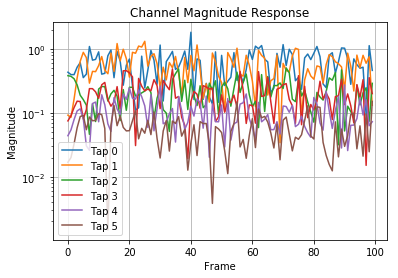

In [17]:
from matplotlib import pyplot as plt
import numpy as np

channel_coeff_np = channel_coeff.to_ndarray()

plt.figure()
plt.grid(True)
legend_strings = []
for tap in range(nrof_taps):
    plt.semilogy(abs(channel_coeff_np[:, tap]))
    legend_strings.append('Tap ' + str(tap))

plt.legend(legend_strings)
plt.title('Channel Magnitude Response')
plt.xlabel('Frame')
plt.ylabel('Magnitude')

Plot channel frequency response

Text(0,0.5,u'Angle')

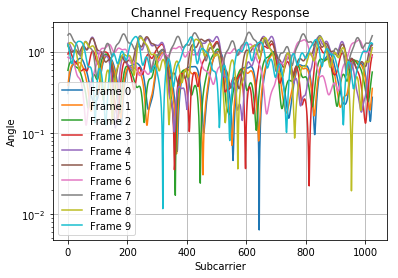

In [18]:
freq_resp = cmat()

channel.calc_frequency_response(channel_coeff, freq_resp, fft_size)


freq_resp_np = freq_resp.to_ndarray()

plt.figure()
plt.grid(True)
legend_strings = []
for frame_index in range(10):
    plt.semilogy(abs(freq_resp_np[:, frame_index]))
    legend_strings.append('Frame ' + str(frame_index))

plt.legend(legend_strings)
plt.title('Channel Frequency Response')
plt.xlabel('Subcarrier')
plt.ylabel('Angle')